In [1]:
# Import dependencies
import numpy as np
import torch
import torchvision
from torch.utils.data.dataset import Dataset
from torchvision import datasets, transforms
from torch import nn, optim
import matplotlib.pyplot as plt

### Problem 4.1 Determine an appropriate learning rate η

In [2]:
# ################## Part 1: load data and create batch ##################
N_total = 600
N_train = 500
x = torch.unsqueeze(torch.linspace(0, 1, N_total), dim=1)
r = torch.randperm(N_total)
x = x[r, :]
y = 0.2 + 0.4 * torch.pow(x, 2) + 0.3 * x * torch.sin(15 * x) + 0.05 * torch.cos(50 * x)

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.y = y
        self.x = x

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        y1 = self.y[idx]
        x1 = self.x[idx]
        return (x1, y1)

trainset = CustomDataset(x[0:N_train, :], y[0:N_train, :])
testset = CustomDataset(x[N_train:N_total, :], y[N_train:N_total, :])
train_loader = torch.utils.data.DataLoader(trainset, batch_size=50)
test_loader = torch.utils.data.DataLoader(testset, batch_size=50)

In [3]:
# ################## Part 2: Define Model and initialize ##################
# Neural network model
model = nn.Sequential(
    nn.Linear(1, 1024, bias=True),
    nn.ReLU(),
    nn.Linear(1024, 1, bias=True)
)

def init_weights(m):
    if isinstance(m, nn.Linear):
        m.weight.data.uniform_(-1, 1)
        m.bias.data.uniform_(-1, 1)

model.apply(init_weights)

Sequential(
  (0): Linear(in_features=1, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=1, bias=True)
)

In [4]:
# ################## Part 3: Define Loss and optimizer ##################
# Using L2 loss (mean squared error)
criterion = torch.nn.MSELoss()

In [5]:
# ################## Part 4: Optimization ##################
def train_NN(optimizer):
    model.train()
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        out = model(images)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss.item()

def test_NN(loader):
    model.eval()
    loss = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.view(images.shape[0], -1)
            out = model(images)
            loss += criterion(out, labels).item()
    return loss / len(loader)

In [6]:
# ################## Experiment with Different Learning Rates ##################
N_epoch = 500
learning_rates = [0.01, 0.001, 0.0001]
train_losses = {}
test_losses = {}

for lr in learning_rates:
    # Initialize a new optimizer with the current learning rate
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    train_loss = np.zeros((N_epoch, 1))
    test_loss = np.zeros((N_epoch, 1))

    # Training loop
    for epoch in range(N_epoch):
        train_NN(optimizer)  # Train the model
        train_loss[epoch, 0] = test_NN(train_loader)  # Evaluate train loss
        test_loss[epoch, 0] = test_NN(test_loader)  # Evaluate test loss
        if epoch % 50 == 0:
            print(f'Epoch: {epoch:03d}, LR: {lr}, Train loss: {train_loss[epoch, 0]:.7f}, Test loss: {test_loss[epoch, 0]:.7f}')
    
    train_losses[lr] = train_loss
    test_losses[lr] = test_loss

Epoch: 000, LR: 0.01, Train loss: 2.1317052, Test loss: 2.1690880
Epoch: 050, LR: 0.01, Train loss: 0.0001825, Test loss: 0.0001889
Epoch: 100, LR: 0.01, Train loss: 0.0000593, Test loss: 0.0000747
Epoch: 150, LR: 0.01, Train loss: 0.0078053, Test loss: 0.0078132
Epoch: 200, LR: 0.01, Train loss: 0.0020632, Test loss: 0.0019835
Epoch: 250, LR: 0.01, Train loss: 0.0019578, Test loss: 0.0020027
Epoch: 300, LR: 0.01, Train loss: 0.0029916, Test loss: 0.0030689
Epoch: 350, LR: 0.01, Train loss: 0.0030511, Test loss: 0.0030991
Epoch: 400, LR: 0.01, Train loss: 0.0010209, Test loss: 0.0009583
Epoch: 450, LR: 0.01, Train loss: 0.0716941, Test loss: 0.0711721
Epoch: 000, LR: 0.001, Train loss: 0.0653664, Test loss: 0.0650113
Epoch: 050, LR: 0.001, Train loss: 0.0000592, Test loss: 0.0000514
Epoch: 100, LR: 0.001, Train loss: 0.0000378, Test loss: 0.0000346
Epoch: 150, LR: 0.001, Train loss: 0.0000286, Test loss: 0.0000330
Epoch: 200, LR: 0.001, Train loss: 0.0001094, Test loss: 0.0001163
Epoch

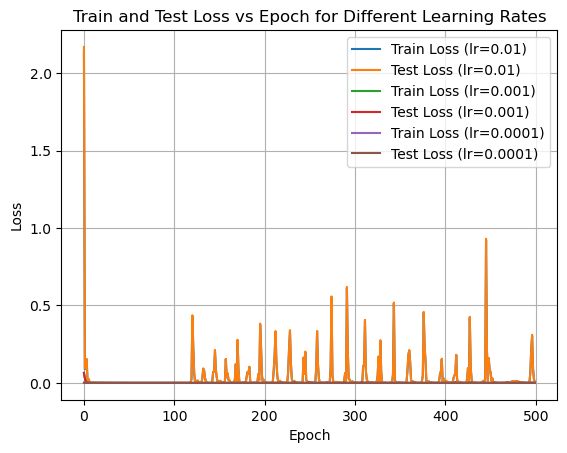

In [7]:
# ################## Plot Results ##################
for lr in learning_rates:
    plt.plot(train_losses[lr], label=f'Train Loss (lr={lr})')
    plt.plot(test_losses[lr], label=f'Test Loss (lr={lr})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss vs Epoch for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

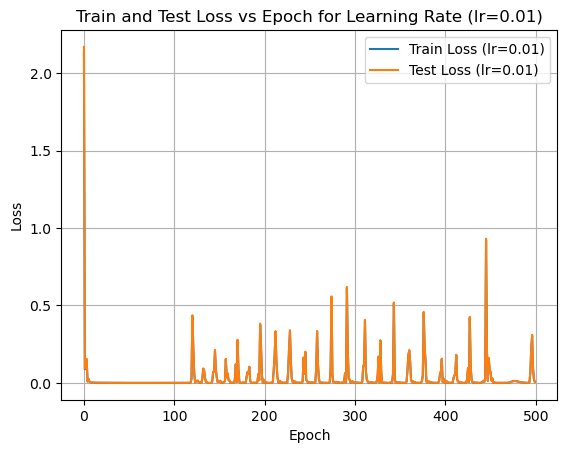

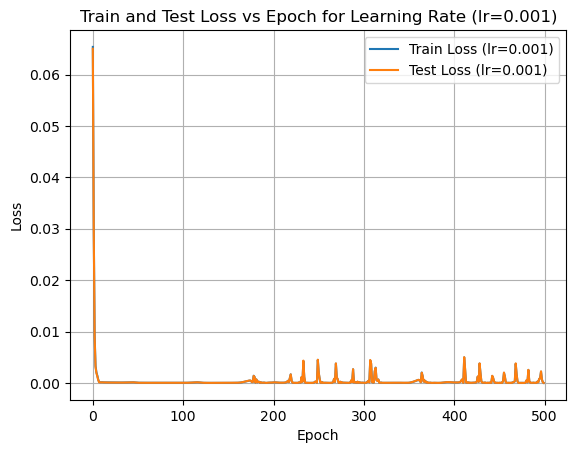

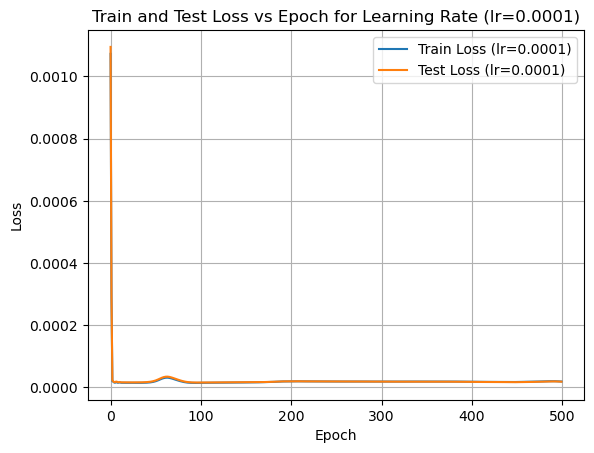

In [8]:
# ################## Plot Results for each learning rate ##################
for lr in learning_rates:
    plt.figure()  # Create a new figure for each learning rate
    plt.plot(train_losses[lr], label=f'Train Loss (lr={lr})')
    plt.plot(test_losses[lr], label=f'Test Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Train and Test Loss vs Epoch for Learning Rate (lr={lr})')
    plt.legend()
    plt.grid(True)
    plt.show()

- Learning Rate η = 0.01: In the first graph, although the training and test losses decrease rapidly at the start, there are significant fluctuations throughout the training process. These fluctuations indicate that the learning rate is too large, causing instability. The model updates too aggressively, resulting in the loss bouncing around and not converging smoothly.

- Learning Rate η = 0.001: The second graph shows a rapid initial decrease in the loss, with relatively minor fluctuations. The loss continues to decrease and eventually stabilizes, though some minor oscillations remain. Compared to η = 0.01, this learning rate results in more stable training, and the model converges relatively fast without large fluctuations.

- Learning Rate η = 0.0001: In the third graph, the loss decreases very smoothly but converges more slowly. The loss is very small throughout the training process, but the model takes longer to reach this point. Although this learning rate is stable, it is slower in convergence, which may require more epochs to achieve optimal results.

- Conclusion: The recommended learning rate is η = 0.001.

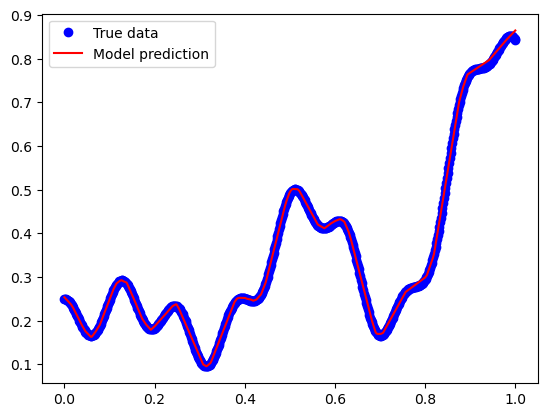

In [9]:
# ################## Final Prediction ##################
x_test = torch.unsqueeze(torch.linspace(0, 1, 1999), dim=1)
y_test = model(x_test)

# Plot the results
plt.plot(x[0:N_total], y[0:N_total], 'bo', label='True data')
plt.plot(x_test, y_test.detach().numpy(), 'r', label='Model prediction')
plt.legend()
plt.show()

Determine an appropriate learning rate η = 0.001